<h1><strong><u>Naive Bayes Model</u></strong></h1>

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV, validation_curve
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline

<h2><u>Data Loading</u></h2>

In [24]:
df = pd.DataFrame(columns=["title", "target"])

In [25]:
# Formatting text files
titles = []
targets = []
file_path_dict = {'clickbait': './clickbait_data.txt', 'non clickbait': './non_clickbait_data.txt'}
for key, value in file_path_dict.items():
    with open(value, 'r') as file:
        for line_number, line in enumerate(file):
            line = line.strip()
            if line != "":
                titles.append(line)
                targets.append(key)
data_dict = {"title": titles, "target": targets}
df = pd.DataFrame(data_dict)


In [26]:
data = df.sample(frac=1, random_state=0).reset_index(drop=True)
display(data)

,title,target
0,UK guinea pig farm to close after owner's fami...,non clickbait
1,18 Sweet Pumpkin Treats You Won't Believe Are ...,clickbait
2,"A Guy Just Did The Most Epic ""Cha Cha Slide"" D...",clickbait
3,Premium gas discounted for a few hours,non clickbait
4,Sanctions on US products introduced by Brazil,non clickbait
...,...,...
31995,"Men, Stephen King Has A Really Important Messa...",clickbait
31996,Greek government faces censure motion by oppos...,non clickbait
31997,15 Holiday Cocktails That Are Basically Dessert,clickbait
31998,This Corgi And Baby Are Best Friends And It's ...,clickbait


In [27]:
X = data["title"]
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
display(X_train.shape) 
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(25600,)

(6400,)

(25600,)

(6400,)

In [28]:
def custom_tokenizer(text):
        from nltk.tokenize import word_tokenize
        from nltk.corpus import stopwords
        from nltk.stem import WordNetLemmatizer
        import re
        en_stopwords = stopwords.words('english')
        lemmatizer = WordNetLemmatizer()
        new_text = text.lower() #lowercase

        new_text = re.sub(r"([^\w\s])", "", new_text) #remove punctuation

        for word in new_text.split(): #remove stopwords
            if word in en_stopwords:
                new_text = new_text.replace(word, "")
        
        new_text = word_tokenize(new_text) #tokenize

        new_text = [lemmatizer.lemmatize(token) for token in new_text] #lemmatize
        return new_text

<h2><strong><u>Naive Bayes Model Selection</u></strong></h2>

I believe that the <strong>BernoulliNB</strong> model is the best Naive Bayes model for this dataset because it is designed for binary/boolean features which is what this dataset has.

<h3><u>Validation Curves</u></h3>

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END ....................................clf__alpha=0.01; total time=   5.5s
[CV] END ...................................clf__alpha=0.001; total time=   5.5s
[CV] END .......................................clf__alpha=1; total time=   5.5s
[CV] END ..................................clf__alpha=0.0001; total time=   5.5s
[CV] END ......................................clf__alpha=10; total time=   5.6s
[CV] END ...................................clf__alpha=0.001; total time=   5.7s
[CV] END .....................................clf__alpha=0.1; total time=   5.7s
[CV] END ..................................clf__alpha=0.0001; total time=   5.8s
[CV] END ....................................clf__alpha=0.01; total time=   3.4s
[CV] END .......................................clf__alpha=1; total time=   3.3s
[CV] END ......................................clf__alpha=10; total time=   3.4s
[CV] END .....................................clf__alpha=0.1; total time=   3.5s
[CV] END ...................

[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:   16.1s remaining:   16.1s


[CV] END .......................................clf__alpha=1; total time=   3.1s
[CV] END ...................................clf__alpha=0.001; total time=   3.0s
[CV] END ......................................clf__alpha=10; total time=   3.1s
[CV] END ..................................clf__alpha=0.0001; total time=   3.1s
[CV] END ....................................clf__alpha=0.01; total time=   3.1s
[CV] END ......................................clf__alpha=10; total time=   2.9s
[CV] END .....................................clf__alpha=0.1; total time=   3.1s
[CV] END .......................................clf__alpha=1; total time=   3.1s
[CV] END ..................................clf__alpha=0.0001; total time=   2.5s
[CV] END ...................................clf__alpha=0.001; total time=   2.5s
[CV] END ....................................clf__alpha=0.01; total time=   2.6s
[CV] END .....................................clf__alpha=0.1; total time=   2.6s
[CV] END ...................

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   25.9s finished


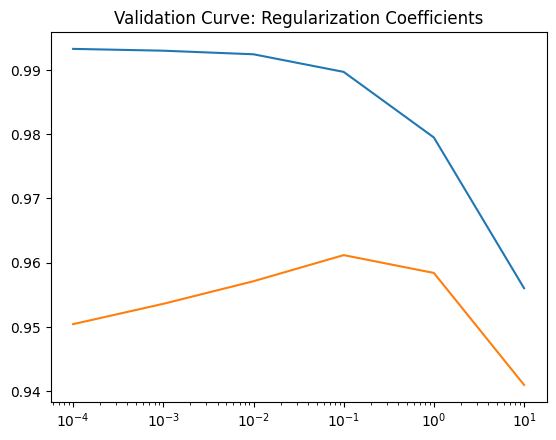

In [29]:
pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer(tokenizer=custom_tokenizer, token_pattern=None)),
        ("clf", BernoulliNB())
    ]
)
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
train_scores, validation_scores = validation_curve(pipeline, X_train, y_train, cv=5, scoring='accuracy',
                                                   param_name="clf__alpha",
                                                   param_range=alphas,
                                                   verbose=2,
                                                   n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.title("Validation Curve: Regularization Coefficients")
plt.semilogx(alphas, train_scores_mean)
plt.semilogx(alphas, validation_scores_mean)

<h4><u>Findings From 'Regularization Coefficients' Validation Curve</u></h4>
The shape of this plot suggest that the optimal range for generalization is between 0.1-10. I believe the best regularization coefficient is between 1-10 because that is where the slope of the two line appears the most similar.

<h3><u>Cross Validation Testing</u></h3>

In [30]:
pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer(tokenizer=custom_tokenizer, token_pattern=None)),
        ("clf", BernoulliNB())
    ]
)
param_grid = {
    "clf__alpha": [1, 3, 5, 7, 9],
}

model = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)
model.fit(X_train, y_train)
nb_classifier = model.best_estimator_
model.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 4/5] END ......................clf__alpha=1;, score=0.957 total time=   3.2s
[CV 1/5] END ......................clf__alpha=1;, score=0.960 total time=   3.3s
[CV 2/5] END ......................clf__alpha=1;, score=0.957 total time=   3.3s
[CV 3/5] END ......................clf__alpha=1;, score=0.961 total time=   3.3s
[CV 2/5] END ......................clf__alpha=3;, score=0.951 total time=   3.3s
[CV 1/5] END ......................clf__alpha=3;, score=0.954 total time=   3.3s
[CV 5/5] END ......................clf__alpha=1;, score=0.958 total time=   3.4s
[CV 3/5] END ......................clf__alpha=3;, score=0.954 total time=   3.3s
[CV 5/5] END ......................clf__alpha=3;, score=0.953 total time=   3.1s
[CV 3/5] END ......................clf__alpha=5;, score=0.950 total time=   3.0s
[CV 4/5] END ......................clf__alpha=3;, score=0.952 total time=   3.2s
[CV 4/5] END ......................clf__alpha=5;,

{'clf__alpha': 1}

<h3><strong><u>Learning Curve</u></strong></h4>

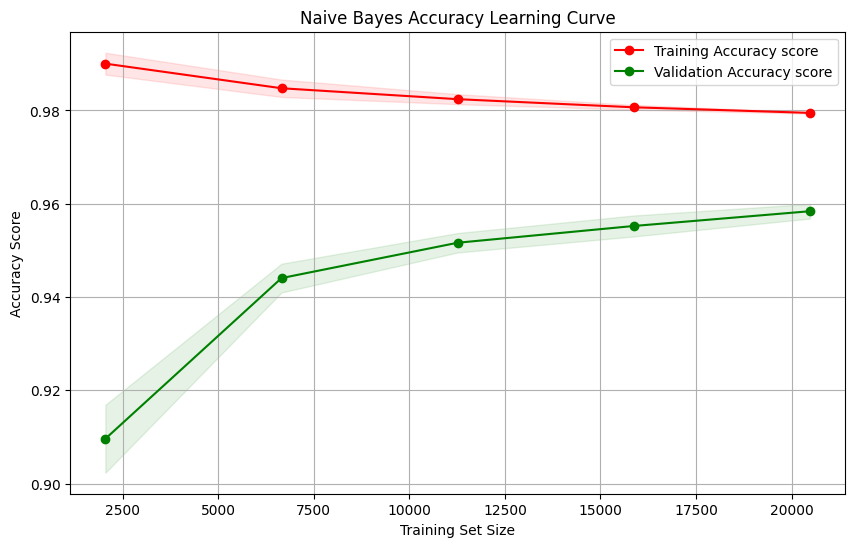

In [31]:
nb_train_sizes, nb_train_scores, nb_validation_scores = learning_curve(
    nb_classifier,
    X_train,
    y_train,
    cv=5,  # Number of folds for cross-validation
    scoring='accuracy',  # Metric to evaluate the model
    n_jobs=-1,  # Use all available CPU cores
)

# Calculate mean and standard deviation for scores
nb_train_scores_mean = np.mean(nb_train_scores, axis=1)
nb_train_scores_std = np.std(nb_train_scores, axis=1)
nb_validation_scores_mean = np.mean(nb_validation_scores, axis=1)
nb_validation_scores_std = np.std(nb_validation_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Naive Bayes Accuracy Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.grid()

plt.fill_between(nb_train_sizes, nb_train_scores_mean - nb_train_scores_std,
                nb_train_scores_mean + nb_train_scores_std, alpha=0.1, color="r")
plt.fill_between(nb_train_sizes, nb_validation_scores_mean - nb_validation_scores_std,
                nb_validation_scores_mean + nb_validation_scores_std, alpha=0.1, color="g")
plt.plot(nb_train_sizes, nb_train_scores_mean, 'o-', color="r",
            label="Training Accuracy score")
plt.plot(nb_train_sizes, nb_validation_scores_mean, 'o-', color="g",
            label="Validation Accuracy score")

plt.legend(loc="best")
plt.show()

<h4><u>Findings From Learning Curve</u></h4>
I believe that the overall shape of the learning curve is good. The training and the validation curves are diverging towards each other which suggests that the model is understanding the general logic of the data. I believe this Naive Bayes model is a good model to move forward with.

<h2><strong><u>Metrics</u></strong></h2>

<h3><u>Naive Bayes Training Metrics</u></h3>

In [32]:
nb_training_values = cross_val_score(nb_classifier, X_train, y_train, scoring='accuracy', cv=5)
print("Cross-validation Accuracy training scores: ", nb_training_values)
np_nb_training_values = np.array(nb_training_values)
average = np.mean(np_nb_training_values)
stDev = np.std(np_nb_training_values)
print(average.round(2), " +/- ", stDev.round(4), "\n")

Cross-validation Accuracy training scores:  [0.95996094 0.95703125 0.96054688 0.95664063 0.9578125 ]
0.96  +/-  0.0016 



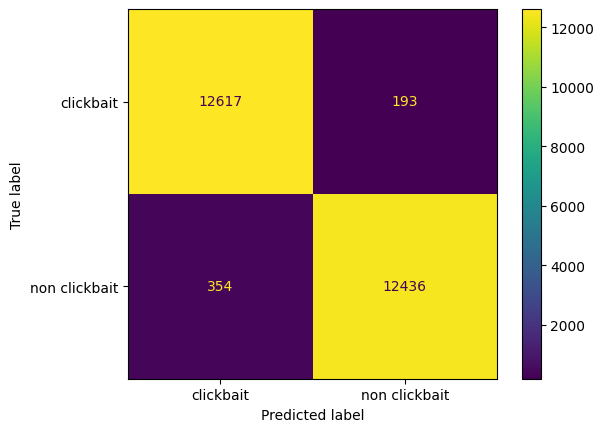

In [33]:
#Training Confusion Matrix
ConfusionMatrixDisplay.from_estimator(nb_classifier, X_train, y_train)

<h3><u>Naive Bayes Testing Metrics</u></h3>

In [34]:
nb_test_predictions = nb_classifier.predict(X_test)

nb_test_accuracy = accuracy_score(y_test, nb_test_predictions)
print("Multi-layer Perceptron Test Accuracy: {:.2f}%".format(nb_test_accuracy * 100))

Multi-layer Perceptron Test Accuracy: 95.70%


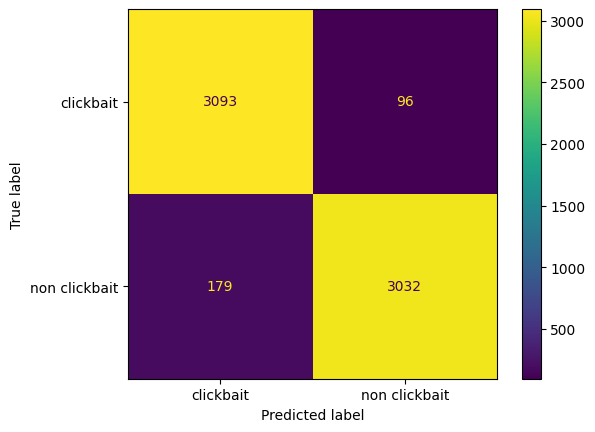

In [35]:
#Testing Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, nb_test_predictions)